In [ ]:
# this notebook is just following this
# https://www.youtube.com/playlist?list=PLQY2H8rRoyvwWuPiWnuTDBHe7I0fMSsfO
# and also the stuff linked in it, mostly the latter actually
# in between the tutorial stuff you have 'extras' where you mess about with the library on your own

In [ ]:
pip install tensorflow
# done

In [1]:
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

# this thing is for supressing output
# use 
with suppress_stdout():
    print("invisible output, woooo")
# for it to work
            
def maxIndex(l):
    max_index = -1
    max_val = - np.Infinity
    for i, n in enumerate(l):
        if max_val < n:
            max_val = n
            max_index = i
    return max_index
            
# IMPORTS GO HERE
import tensorflow as tf
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt 

In [24]:
# vid 1 / tutorial 1
# basic linear function, 1 layer 1 node
# https://www.youtube.com/watch?v=KNAWp2S3w94&list=PLQY2H8rRoyvwWuPiWnuTDBHe7I0fMSsfO&index=1
# https://developers.google.com/codelabs/tensorflow-1-helloworld#0

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)
# the data is 3x + 1

with suppress_stdout():
    model.fit(xs, ys, epochs=100)

print(model.predict([10.0]))

1/1 [==============================] - 0s 41ms/step
[[31.018007]]


In [ ]:
# extra 1
# fit cubic function

model = tf.keras.Sequential([
                            keras.layers.Dense(units=1, input_shape=[1])
                            ])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([x for x in range(-10, 11)], dtype = float)
ys = np.array([(x-1)*(x-2)*(x-3) for x in xs], dtype = float)
# the data is (x-1)(x-2)(x-3)

with suppress_stdout():
    model.fit(xs, ys, epochs=10)

predicty = np.array([model.predict([x]) for x in xs], dtype = float)

model.evaluate(xs, predicty)

plt.title("predicty position") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.plot(xs, predicty[:,0,0]) 
plt.show()

In [4]:
# tutorial 2
# clothing recognition using an existing dataset
# https://developers.google.com/codelabs/tensorflow-2-computervision#0

def getItemName(n): # VERY USEFUL FUNCTION
    if not n in range(10):
        return "what"
    return {
        0: "T-shirt/top",
        1: "Trousers m8 gadseibdaqween",
        2: "Pullover",
        3: "Dress",
        4: "Coat",
        5: "Sandal",
        6: "Shirt",
        7: "Sneaker",
        8: "Bag",
        9: "Ankle boot (big boot)"
    }[n]

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)

model.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4974 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3773 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3368 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3124 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2916 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2794 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2685 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2552 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2462 - accuracy: 0.9086
Epoch 10/10
313/313 [==============================] - 0s 866us/step - loss: 0.340

[0.34051913022994995, 0.8769000172615051]

In [10]:
# tutorial 2 exploration exercises
# https://developers.google.com/codelabs/tensorflow-2-computervision#5

# Exercise 1
"""
classifications = model.predict(test_images)
print(classifications[0])
print(maxIndex(classifications[0]))
"""
# Exercise 2
"""
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
model.evaluate(test_images, test_labels)
"""
# Exercise 3
# ye okei, neat

# Exercise 4
# yeah no shit

# Exercise 5
"""
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0
print("nooral netwrc")
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
model.evaluate(test_images, test_labels)
print("it actually is more accurate lol")
"""
# Exercise 6
"""
print("COPY PASTED CODE WOOOOOOOOOO")
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])
"""

'\nprint("COPY PASTED CODE WOOOOOOOOOO")\nmnist = tf.keras.datasets.fashion_mnist\n(training_images, training_labels), (test_images, test_labels) = mnist.load_data()\n#training_images=training_images/255.0\n#test_images=test_images/255.0\nmodel = tf.keras.models.Sequential([tf.keras.layers.Flatten(), \n                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), \n                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])\nmodel.compile(optimizer = tf.keras.optimizers.Adam(),\n              loss = \'sparse_categorical_crossentropy\',\n              metrics=[\'accuracy\'])\n\nmodel.fit(training_images, training_labels, epochs=10)\nmodel.evaluate(test_images, test_labels)\nclassifications = model.predict(test_images)\nprint(classifications[0])\nprint(test_labels[0])\n'

In [13]:
# tutorial 2 callbacks
# https://developers.google.com/codelabs/tensorflow-2-computervision#6

_desired_accuracy = 0.85

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if _desired_accuracy < logs.get('accuracy'):
            print(f"\nReached {_desired_accuracy*100}% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4734 - accuracy: 0.8319
Epoch 2/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.3577 - accuracy: 0.8687
Reached 85.0% accuracy so cancelling training!
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3579 - accuracy: 0.8687


In [2]:
# tutorial 3 - CNNs
# https://developers.google.com/codelabs/tensorflow-3-convolutions#0

# faff about with an image for a bit I guess
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
i = misc.ascent()
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]



In [ ]:
"""
WISDOMS

Sequential defines a sequence of layers in the neural network.
Flatten takes a square and turns it into a one-dimensional vector.
Dense adds a layer of neurons.
Activation functions tell each layer of neurons what to do. There are lots of options, but use these for now:
Relu effectively means that if X is greater than 0 return X, else return 0. It only passes values of 0 or greater to the next layer in the network.
Softmax takes a set of values, and effectively picks the biggest one. For example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], then it saves you from having to sort for the largest value—it returns [0,0,0,0,1,0,0,0,0].

"""

In [ ]:
"""

TODO LIST WHICH STAYS HERE IN THE BOTTOM OF THE PAGE

fix extra 1 once you know how to make networks with more than one layer

"""

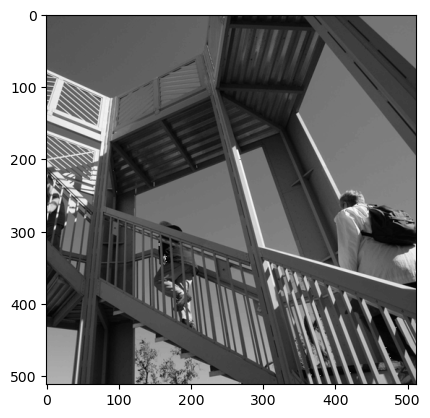

In [3]:
import scipy.misc
ascent = scipy.misc.ascent()
ascent.shape
ascent.max()
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(ascent)
plt.show()
i_transformed = np.copy(ascent)